In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
df = pd.read_csv(r'C:\Users\kingd\Documents\mydata\Global Dataset of Inflation.csv')

In [3]:
display(df.head())

,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1970,1971,1972,1973,1974,...,2015,2016,2017,2018,2019,2020,2021,2022,Note,Unnamed: 59
0,ABW,314.0,Aruba,Inflation,Headline Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,0.48,-0.89,-0.47,3.58,4.26,1.22,0.74,6.04,Annual average inflation,NaN
1,AFG,512.0,Afghanistan,Inflation,Headline Consumer Price Inflation,25.51,25.51,-12.52,-10.68,10.23,...,-0.66,4.38,4.98,0.63,2.30,5.44,5.06,NaN,Annual average inflation,NaN
2,AGO,614.0,Angola,Inflation,Headline Consumer Price Inflation,7.97,5.78,15.80,15.67,27.42,...,9.16,32.38,29.84,19.63,17.08,21.02,23.85,21.35,Annual average inflation,NaN
3,ALB,914.0,Albania,Inflation,Headline Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,1.91,1.29,1.99,2.03,1.41,1.62,2.04,6.73,Annual average inflation,NaN
4,ARE,466.0,United Arab Emirates,Inflation,Headline Consumer Price Inflation,21.98,21.98,21.98,21.98,21.98,...,4.07,1.62,1.97,3.06,-1.93,-2.08,0.18,5.22,Annual average inflation,NaN


In [4]:
cols = df.iloc[:, 5:35]
display(cols)

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.20,3.00,1.88,2.28
1,25.51,25.51,-12.52,-10.68,10.23,11.85,0.60,7.65,5.00,9.90,...,47.40,43.80,58.19,33.99,20.01,14.00,14.01,14.01,14.01,14.01
2,7.97,5.78,15.80,15.67,27.42,29.00,80.70,69.01,48.46,101.30,...,1.83,85.26,299.10,1379.48,949.77,2672.23,4146.01,221.49,107.43,248.25
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.18,35.72,226.00,85.00,22.57,7.75,12.80,33.21,20.55,0.40
4,21.98,21.98,21.98,21.98,21.98,21.98,21.98,21.97,13.04,10.99,...,0.60,3.40,6.38,5.27,5.70,4.33,2.98,2.97,1.99,2.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
781,NaN,5.00,6.35,12.44,18.58,16.42,13.14,14.16,9.68,13.12,...,11.79,11.33,7.60,6.51,8.79,10.49,8.45,8.14,4.43,4.92


In [5]:
new_df = df.drop(cols, axis=1)
display(new_df)

,Country Code,IMF Country Code,Country,Indicator Type,Series Name,2000,2001,2002,2003,2004,...,2015,2016,2017,2018,2019,2020,2021,2022,Note,Unnamed: 59
0,ABW,314.0,Aruba,Inflation,Headline Consumer Price Inflation,4.05,2.89,3.32,3.66,2.53,...,0.48,-0.89,-0.47,3.58,4.26,1.22,0.74,6.04,Annual average inflation,NaN
1,AFG,512.0,Afghanistan,Inflation,Headline Consumer Price Inflation,0.00,-43.40,51.93,35.66,16.36,...,-0.66,4.38,4.98,0.63,2.30,5.44,5.06,NaN,Annual average inflation,NaN
2,AGO,614.0,Angola,Inflation,Headline Consumer Price Inflation,325.03,152.59,108.89,98.22,43.53,...,9.16,32.38,29.84,19.63,17.08,21.02,23.85,21.35,Annual average inflation,NaN
3,ALB,914.0,Albania,Inflation,Headline Consumer Price Inflation,0.03,3.10,5.18,2.38,2.83,...,1.91,1.29,1.99,2.03,1.41,1.62,2.04,6.73,Annual average inflation,NaN
4,ARE,466.0,United Arab Emirates,Inflation,Headline Consumer Price Inflation,1.35,2.80,2.92,3.12,5.04,...,4.07,1.62,1.97,3.06,-1.93,-2.08,0.18,5.22,Annual average inflation,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,VEN,299.0,"Venezuela, RB",Inflation,Producer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,142.03,291.62,905.66,169201.78,NaN,NaN,NaN,NaN,"Producer Price Index, All Commodities",NaN
779,VNM,582.0,Vietnam,Inflation,Producer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,-0.59,-0.61,NaN,NaN,NaN,NaN,NaN,NaN,"Producer Price Index, All Commodities",NaN
780,XKX,967.0,Kosovo,Inflation,Producer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,2.66,-0.07,0.59,1.35,0.93,-0.58,4.92,NaN,"Producer Price Index, All Commodities",NaN
781,ZAF,199.0,South Africa,Inflation,Producer Price Inflation,6.66,2.92,0.22,-1.23,7.66,...,3.61,7.08,4.88,5.45,4.62,2.49,7.12,14.36,"Producer Price Index, All Commodities",NaN


In [6]:
print(new_df.isna().sum())
threshold = len(new_df) * 0.05
cols_to_drop = new_df.columns[new_df.isna().sum() <= threshold]
new_df.dropna(subset=cols_to_drop, inplace=True)
print(new_df.isna().sum())


Country Code          0
IMF Country Code      2
Country               0
Indicator Type        0
Series Name           0
2000                187
2001                173
2002                158
2003                154
2004                149
2005                137
2006                122
2007                112
2008                103
2009                 97
2010                 90
2011                 96
2012                 87
2013                 68
2014                 49
2015                 48
2016                 37
2017                 46
2018                 46
2019                 55
2020                 64
2021                 77
2022                118
Note                  0
Unnamed: 59         764
dtype: int64
Country Code          0
IMF Country Code      0
Country               0
Indicator Type        0
Series Name           0
2000                159
2001                145
2002                131
2003                126
2004                123
2005                112
200

In [48]:
display(new_df)

,Country Code,IMF Country Code,Country,Indicator Type,Series Name,2000,2001,2002,2003,2004,...,2015,2016,2017,2018,2019,2020,2021,2022,Note,Unnamed: 59
0,ABW,314.0,Aruba,Inflation,Headline Consumer Price Inflation,4.05,2.89,3.32,3.66,2.53,...,0.48,-0.89,-0.47,3.58,4.26,1.22,0.74,6.04,Annual average inflation,NaN
1,AFG,512.0,Afghanistan,Inflation,Headline Consumer Price Inflation,0.00,-43.40,51.93,35.66,16.36,...,-0.66,4.38,4.98,0.63,2.30,5.44,5.06,NaN,Annual average inflation,NaN
2,AGO,614.0,Angola,Inflation,Headline Consumer Price Inflation,325.03,152.59,108.89,98.22,43.53,...,9.16,32.38,29.84,19.63,17.08,21.02,23.85,21.35,Annual average inflation,NaN
3,ALB,914.0,Albania,Inflation,Headline Consumer Price Inflation,0.03,3.10,5.18,2.38,2.83,...,1.91,1.29,1.99,2.03,1.41,1.62,2.04,6.73,Annual average inflation,NaN
4,ARE,466.0,United Arab Emirates,Inflation,Headline Consumer Price Inflation,1.35,2.80,2.92,3.12,5.04,...,4.07,1.62,1.97,3.06,-1.93,-2.08,0.18,5.22,Annual average inflation,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,UZB,927.0,Uzbekistan,Inflation,Producer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,NaN,16.29,17.42,31.70,43.35,14.80,9.32,16.34,"Producer Price Index, All Commodities",NaN
778,VEN,299.0,"Venezuela, RB",Inflation,Producer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,142.03,291.62,905.66,169201.78,NaN,NaN,NaN,NaN,"Producer Price Index, All Commodities",NaN
779,VNM,582.0,Vietnam,Inflation,Producer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,-0.59,-0.61,NaN,NaN,NaN,NaN,NaN,NaN,"Producer Price Index, All Commodities",NaN
780,XKX,967.0,Kosovo,Inflation,Producer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,2.66,-0.07,0.59,1.35,0.93,-0.58,4.92,NaN,"Producer Price Index, All Commodities",NaN


In [49]:
new_df.iloc[190:193]

,Country Code,IMF Country Code,Country,Indicator Type,Series Name,2000,2001,2002,2003,2004,...,2015,2016,2017,2018,2019,2020,2021,2022,Note,Unnamed: 59
190,ZAF,199.0,South Africa,Inflation,Headline Consumer Price Inflation,5.34,5.70,9.49,5.68,-0.69,...,4.51,6.59,5.27,4.50,4.13,3.22,4.61,7.00,Annual average inflation,NaN
191,ZMB,754.0,Zambia,Inflation,Headline Consumer Price Inflation,26.07,21.24,22.30,21.31,17.96,...,10.11,17.86,6.58,7.49,9.80,15.73,22.02,10.99,Annual average inflation,NaN
192,ZWE,698.0,Zimbabwe,Inflation,Headline Consumer Price Inflation,4.47,-37.20,-34.44,-8.56,113.57,...,-2.41,-1.57,0.91,10.61,255.29,557.21,98.55,284.94,Annual average inflation,NaN


In [13]:
average_inflation = new_df.iloc[:193]
display(average_inflation)

,Country Code,IMF Country Code,Country,Indicator Type,Series Name,2000,2001,2002,2003,2004,...,2015,2016,2017,2018,2019,2020,2021,2022,Note,Unnamed: 59
0,ABW,314.0,Aruba,Inflation,Headline Consumer Price Inflation,4.05,2.89,3.32,3.66,2.53,...,0.48,-0.89,-0.47,3.58,4.26,1.22,0.74,6.04,Annual average inflation,NaN
1,AFG,512.0,Afghanistan,Inflation,Headline Consumer Price Inflation,0.00,-43.40,51.93,35.66,16.36,...,-0.66,4.38,4.98,0.63,2.30,5.44,5.06,NaN,Annual average inflation,NaN
2,AGO,614.0,Angola,Inflation,Headline Consumer Price Inflation,325.03,152.59,108.89,98.22,43.53,...,9.16,32.38,29.84,19.63,17.08,21.02,23.85,21.35,Annual average inflation,NaN
3,ALB,914.0,Albania,Inflation,Headline Consumer Price Inflation,0.03,3.10,5.18,2.38,2.83,...,1.91,1.29,1.99,2.03,1.41,1.62,2.04,6.73,Annual average inflation,NaN
4,ARE,466.0,United Arab Emirates,Inflation,Headline Consumer Price Inflation,1.35,2.80,2.92,3.12,5.04,...,4.07,1.62,1.97,3.06,-1.93,-2.08,0.18,5.22,Annual average inflation,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,WSM,862.0,Samoa,Inflation,Headline Consumer Price Inflation,-0.17,1.89,7.43,4.37,7.85,...,1.92,0.13,1.30,4.20,2.19,-1.57,-3.01,8.75,Annual average inflation,NaN
189,YEM,474.0,"Yemen, Rep.",Inflation,Headline Consumer Price Inflation,10.96,11.92,12.24,10.83,12.49,...,39.40,5.00,30.40,27.60,10.00,26.18,45.70,43.85,Annual average inflation,NaN
190,ZAF,199.0,South Africa,Inflation,Headline Consumer Price Inflation,5.34,5.70,9.49,5.68,-0.69,...,4.51,6.59,5.27,4.50,4.13,3.22,4.61,7.00,Annual average inflation,NaN
191,ZMB,754.0,Zambia,Inflation,Headline Consumer Price Inflation,26.07,21.24,22.30,21.31,17.96,...,10.11,17.86,6.58,7.49,9.80,15.73,22.02,10.99,Annual average inflation,NaN


In [14]:
print(average_inflation.isna().sum())

Country Code          0
IMF Country Code      0
Country               0
Indicator Type        0
Series Name           0
2000                  6
2001                  4
2002                  4
2003                  3
2004                  2
2005                  1
2006                  1
2007                  1
2008                  1
2009                  1
2010                  1
2011                  1
2012                  0
2013                  0
2014                  0
2015                  0
2016                  0
2017                  1
2018                  1
2019                  1
2020                  2
2021                  2
2022                  4
Note                  0
Unnamed: 59         193
dtype: int64


In [15]:
value_vars = average_inflation.iloc[:, 5:28]

display(value_vars)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,4.05,2.89,3.32,3.66,2.53,3.40,3.61,5.39,8.96,-2.14,...,-2.37,0.42,0.48,-0.89,-0.47,3.58,4.26,1.22,0.74,6.04
1,0.00,-43.40,51.93,35.66,16.36,10.57,6.78,8.68,26.42,-6.81,...,7.39,4.67,-0.66,4.38,4.98,0.63,2.30,5.44,5.06,NaN
2,325.03,152.59,108.89,98.22,43.53,22.96,13.31,12.25,12.47,13.72,...,8.78,7.30,9.16,32.38,29.84,19.63,17.08,21.02,23.85,21.35
3,0.03,3.10,5.18,2.38,2.83,2.36,2.41,2.91,3.41,2.29,...,1.93,1.62,1.91,1.29,1.99,2.03,1.41,1.62,2.04,6.73
4,1.35,2.80,2.92,3.12,5.04,6.20,9.28,11.13,12.27,1.57,...,1.09,2.34,4.07,1.62,1.97,3.06,-1.93,-2.08,0.18,5.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,-0.17,1.89,7.43,4.37,7.85,7.82,3.23,4.48,6.27,14.64,...,-0.21,-1.24,1.92,0.13,1.30,4.20,2.19,-1.57,-3.01,8.75
189,10.96,11.92,12.24,10.83,12.49,9.87,10.85,7.91,18.98,3.67,...,10.97,8.10,39.40,5.00,30.40,27.60,10.00,26.18,45.70,43.85
190,5.34,5.70,9.49,5.68,-0.69,2.06,3.24,6.18,10.06,7.26,...,5.78,6.14,4.51,6.59,5.27,4.50,4.13,3.22,4.61,7.00
191,26.07,21.24,22.30,21.31,17.96,18.30,9.06,10.64,12.44,13.38,...,6.99,7.82,10.11,17.86,6.58,7.49,9.80,15.73,22.02,10.99


In [16]:
dfwide = pd.melt(average_inflation, id_vars=['Country', 'IMF Country Code', "Country Code"], value_vars = value_vars, var_name='Year', value_name='Inflation')
print(dfwide.isna().sum())
display(dfwide)

Country              0
IMF Country Code     0
Country Code         0
Year                 0
Inflation           37
dtype: int64


,Country,IMF Country Code,Country Code,Year,Inflation
0,Aruba,314.0,ABW,2000,4.05
1,Afghanistan,512.0,AFG,2000,0.00
2,Angola,614.0,AGO,2000,325.03
3,Albania,914.0,ALB,2000,0.03
4,United Arab Emirates,466.0,ARE,2000,1.35
...,...,...,...,...,...
4434,Samoa,862.0,WSM,2022,8.75
4435,"Yemen, Rep.",474.0,YEM,2022,43.85
4436,South Africa,199.0,ZAF,2022,7.00
4437,Zambia,754.0,ZMB,2022,10.99


In [17]:
dfwide[dfwide.isnull().any(axis=1)]

,Country,IMF Country Code,Country Code,Year,Inflation
113,Marshall Islands,867.0,MHL,2000,NaN
132,Nauru,836.0,NRU,2000,NaN
139,Palau,565.0,PLW,2000,NaN
157,San Marino,135.0,SMR,2000,NaN
159,South Sudan,733.0,SSD,2000,NaN
177,Tuvalu,869.0,TUV,2000,NaN
306,Marshall Islands,867.0,MHL,2001,NaN
325,Nauru,836.0,NRU,2001,NaN
350,San Marino,135.0,SMR,2001,NaN
352,South Sudan,733.0,SSD,2001,NaN


In [20]:
dfwide.dropna(how='any', inplace=True)

In [21]:
na_inflation = dfwide[(dfwide["Country Code"] == 'USA') | (dfwide["Country Code"] == 'CAN') | (dfwide["Country Code"] == 'MEX')]

In [22]:
display(na_inflation)

,Country,IMF Country Code,Country Code,Year,Inflation
30,Canada,156.0,CAN,2000,2.72
112,Mexico,273.0,MEX,2000,9.49
182,United States,111.0,USA,2000,3.38
223,Canada,156.0,CAN,2001,2.53
305,Mexico,273.0,MEX,2001,6.37
...,...,...,...,...,...
4165,Mexico,273.0,MEX,2021,5.69
4235,United States,111.0,USA,2021,4.70
4276,Canada,156.0,CAN,2022,6.80
4358,Mexico,273.0,MEX,2022,7.90


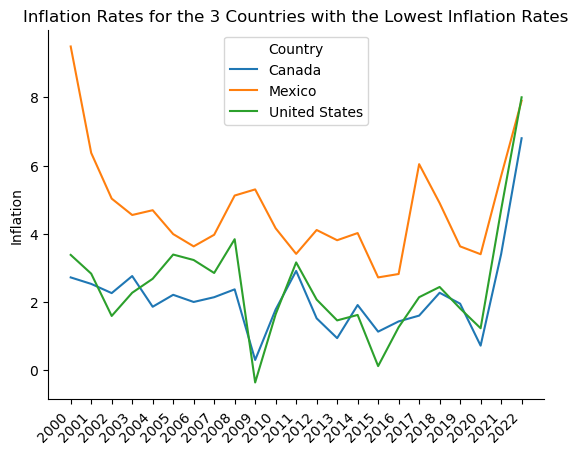

In [23]:
sns.lineplot(x='Year', y='Inflation', data=na_inflation, hue='Country')
plt.xticks(rotation=45, ha='right')
plt.xlabel("")
plt.ylabel("Inflation")
plt.title("Inflation Rates for the 3 Countries with the Lowest Inflation Rates")
sns.despine()
plt.show()

In [24]:
dfwide.groupby(['Country', 'Country Code'])['Inflation'].mean().nsmallest(3)

Country            Country Code
Japan              JPN             0.190000
Switzerland        CHE             0.541304
Brunei Darussalam  BRN             0.546087
Name: Inflation, dtype: float64

In [25]:
dfwide.groupby(['Country', 'Country Code'])['Inflation'].mean().nlargest(3)

Country        Country Code
Venezuela, RB  VEN             3941.143478
Sudan          SDN              783.062174
South Sudan    SSD               79.947273
Name: Inflation, dtype: float64

In [26]:
df_lowest = dfwide[(dfwide["Country Code"] == 'JPN') | (dfwide["Country Code"] == 'CHE') | (dfwide["Country Code"] == 'BRN')]
df_highest = dfwide[(dfwide["Country Code"] == 'VEN') | (dfwide["Country Code"] == 'SDN') | (dfwide["Country Code"] == 'ZWE')]

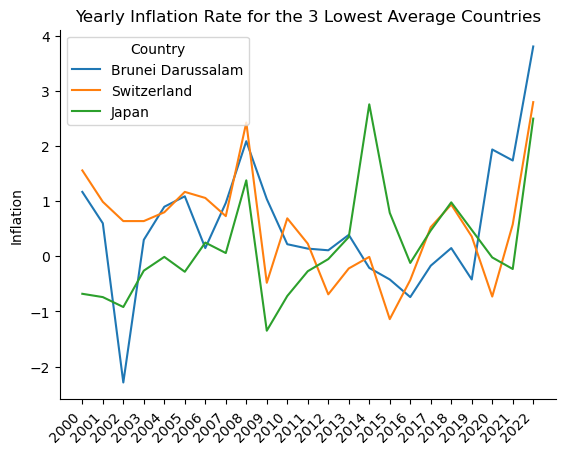

In [27]:
sns.lineplot(x='Year', y='Inflation', data=df_lowest, hue='Country')
plt.xticks(rotation=45, ha='right')
plt.xlabel("")
plt.ylabel("Inflation")
plt.title("Yearly Inflation Rate for the 3 Lowest Average Countries")
sns.despine()
plt.show()

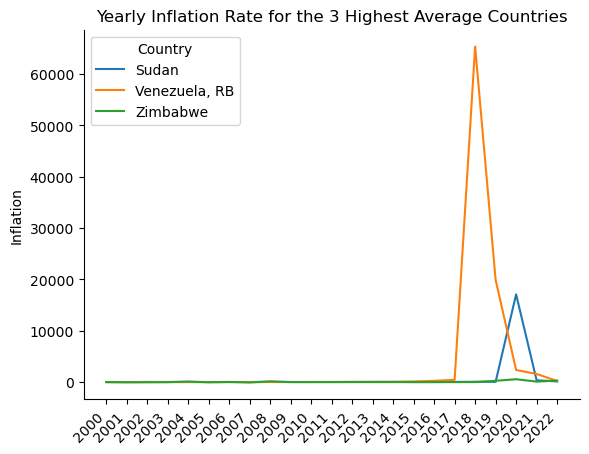

In [30]:
sns.lineplot(x='Year', y='Inflation', data=df_highest, hue='Country')
plt.xticks(rotation=45, ha='right')
plt.xlabel("")
plt.ylabel("Inflation")
plt.title("Yearly Inflation Rate for the 3 Highest Average Countries")
sns.despine()
plt.show()

In [31]:
dfz = pd.read_excel(r'C:\Users\kingd\Documents\mydata\Banking.xlsx')
dfz.head()

,Economy,Year,ISO-3 code,Institutions of commercial banks,Number of credit unions and credit cooperatives,Number of deposit-taking microfinance institutions,Number of other deposit takers,Number of non-deposit taking microfinance institutions,Number of insurance corporations,Branches of commercial banks,...,Outstanding balances on active mobile money accounts (% of GDP),"Number of mobile money transactions (during the reference year) per 1,000 adults",Value of mobile money transactions (during the reference year) (% of GDP),Average no. of mobile money transactions per active mob mon account,"Number of credit cards per 1,000 adults","Number of debit cards per 1,000 adults","No of mobile and internet banking transac (during reference yr) per 1,000 adults",Value of mobile and internet banking transac (during reference yr) (% of GDP),"Number of life insurance policies per 1,000 adults","Number of Non-life insurance policies per 1,000 adults"
0,"Afghanistan, Islamic Rep. of",2004,AFG,10.0,NaN,NaN,NaN,NaN,NaN,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Afghanistan, Islamic Rep. of",2005,AFG,12.0,NaN,NaN,NaN,NaN,NaN,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Afghanistan, Islamic Rep. of",2006,AFG,12.0,NaN,NaN,NaN,NaN,1.0,115.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Afghanistan, Islamic Rep. of",2007,AFG,15.0,NaN,NaN,NaN,NaN,4.0,159.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Afghanistan, Islamic Rep. of",2008,AFG,16.0,NaN,NaN,NaN,NaN,3.0,196.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df_bank = dfz[['Economy', 'Year', 'ISO-3 code', 'Number of commercial bank branches per 100,000 adults']]
display(df_bank)

,Economy,Year,ISO-3 code,"Number of commercial bank branches per 100,000 adults"
0,"Afghanistan, Islamic Rep. of",2004,AFG,0.366621
1,"Afghanistan, Islamic Rep. of",2005,AFG,0.583124
2,"Afghanistan, Islamic Rep. of",2006,AFG,0.923777
3,"Afghanistan, Islamic Rep. of",2007,AFG,1.237723
4,"Afghanistan, Islamic Rep. of",2008,AFG,1.477083
...,...,...,...,...
3415,Zimbabwe,2017,ZWE,5.641137
3416,Zimbabwe,2018,ZWE,5.483009
3417,Zimbabwe,2019,ZWE,3.753888
3418,Zimbabwe,2020,ZWE,4.169702


In [55]:
dfwide["Year"] = dfwide["Year"].astype("int32")
merged_df = pd.merge(dfwide, df_bank, left_on=['Country Code', 'Year'], right_on=['ISO-3 code', 'Year'])
display(merged_df)


,Country,IMF Country Code,Country Code,Year,Inflation,Economy,ISO-3 code,"Number of commercial bank branches per 100,000 adults"
0,Aruba,314.0,ABW,2004,2.53,"Aruba, Kingdom of the Netherlands",ABW,NaN
1,Afghanistan,512.0,AFG,2004,16.36,"Afghanistan, Islamic Rep. of",AFG,0.366621
2,Angola,614.0,AGO,2004,43.53,Angola,AGO,1.809133
3,Albania,914.0,ALB,2004,2.83,Albania,ALB,9.682338
4,United Arab Emirates,466.0,ARE,2004,5.04,United Arab Emirates,ARE,15.065810
...,...,...,...,...,...,...,...,...
3330,Samoa,862.0,WSM,2021,-3.01,Samoa,WSM,25.418410
3331,"Yemen, Rep.",474.0,YEM,2021,45.70,"Yemen, Rep. of",YEM,NaN
3332,South Africa,199.0,ZAF,2021,4.61,South Africa,ZAF,7.967437
3333,Zambia,754.0,ZMB,2021,22.02,Zambia,ZMB,2.875483


In [91]:
merged_df = merged_df.rename(columns={'Number of commercial bank branches per 100,000 adults': 'Banks Per Person'})
merged_df = merged_df.dropna(subset=['Banks Per Person'])
display(merged_df)


,Country,IMF Country Code,Country Code,Year,Inflation,Economy,ISO-3 code,Banks Per Person
1,Afghanistan,512.0,AFG,2004,16.36,"Afghanistan, Islamic Rep. of",AFG,0.366621
2,Angola,614.0,AGO,2004,43.53,Angola,AGO,1.809133
3,Albania,914.0,ALB,2004,2.83,Albania,ALB,9.682338
4,United Arab Emirates,466.0,ARE,2004,5.04,United Arab Emirates,ARE,15.065810
5,Argentina,213.0,ARG,2004,4.42,Argentina,ARG,13.429470
...,...,...,...,...,...,...,...,...
3329,Vanuatu,846.0,VUT,2021,2.34,Vanuatu,VUT,21.080880
3330,Samoa,862.0,WSM,2021,-3.01,Samoa,WSM,25.418410
3332,South Africa,199.0,ZAF,2021,4.61,South Africa,ZAF,7.967437
3333,Zambia,754.0,ZMB,2021,22.02,Zambia,ZMB,2.875483


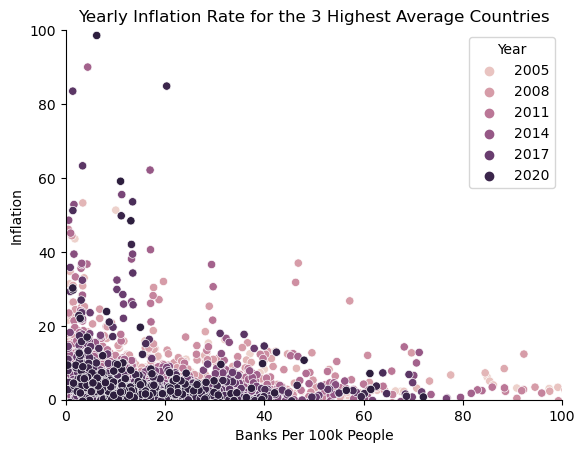

In [101]:
sns.scatterplot(x='Banks Per Person', y='Inflation', data=merged_df, hue='Year')
plt.xlabel("Banks Per 100k People")
plt.ylabel("Inflation")
plt.title("Yearly Inflation Rate for the 3 Highest Average Countries")
plt.xlim(0, 100)
plt.ylim(0, 100)
sns.despine()
plt.show()

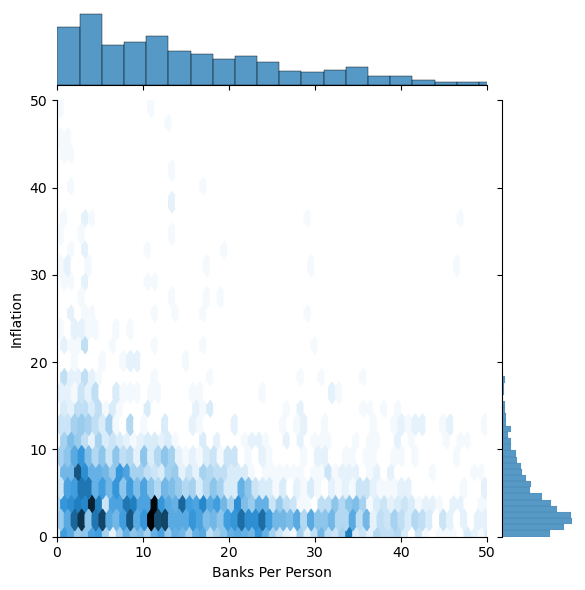

In [104]:
sns.jointplot(x='Banks Per Person', y='Inflation', data=merged_df, kind='hex', gridsize=300)
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.show()

In [108]:
X = merged_df['Banks Per Person'].values.reshape(-1, 1)
X = sm.add_constant(X) 
model = sm.OLS(merged_df['Inflation'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Inflation   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     27.19
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           1.96e-07
Time:                        21:04:53   Log-Likelihood:                -12893.
No. Observations:                3088   AIC:                         2.579e+04
Df Residuals:                    3086   BIC:                         2.580e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0151      0.376     18.668      0.0